In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_emirate = pd.read_csv('raw_data/emirates.csv')
df_etihad = pd.read_csv('raw_data/etihad_airways.csv')
df_qatar = pd.read_csv('raw_data/qatar_airways.csv')

In [4]:
# Drop unwanted columns
columns_to_drop = ['status', 'author', 'aircraft', 'review_date', 'traveller_type', 'cabin', 'route', 'date_flown', 'customer_review']

columns_to_drop = [col for col in columns_to_drop if col in df_emirate.columns]
df_emirate = df_emirate.drop(columns_to_drop, axis=1)
df_etihad = df_etihad.drop(columns_to_drop, axis=1)
df_qatar = df_qatar.drop(columns_to_drop, axis=1)

Mean Squared Error: 1.84
           Feature  Coefficient
0     seat_comfort     0.198085
1    cabin_service     0.453527
2         food_bev     0.243410
3    entertainment     0.074535
4   ground_service     0.380775
5  value_for_money     1.061133


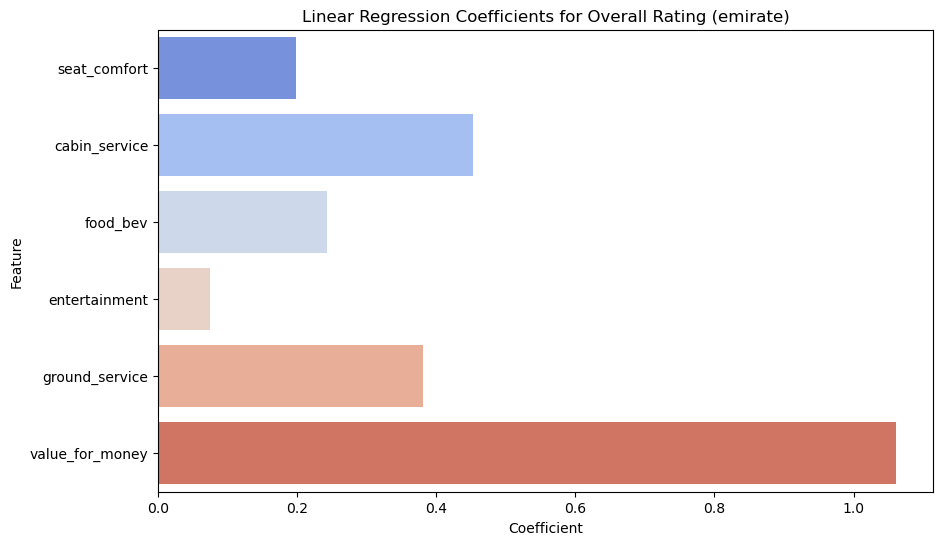

In [7]:
from sklearn.impute import SimpleImputer

df_emirate['overall'] = pd.to_numeric(df_emirate['overall'], errors='coerce')

numeric_columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Drop only the rows where there are missing values in the 'overall' column
df_emirate = df_emirate.dropna(subset=['overall'])

# Define numerical independent variables (X) and the target variable (y)
X = df_emirate[numeric_columns]
y = df_emirate['overall']

# Impute missing values in X using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Display coefficients to see the impact of each feature on the overall rating
coefficients = pd.DataFrame({'Feature': numeric_columns, 'Coefficient': model.coef_})
print(coefficients)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Linear Regression Coefficients for Overall Rating (emirate)')
plt.show()


Mean Squared Error: 2.20
           Feature  Coefficient
0     seat_comfort     0.293181
1    cabin_service     0.349146
2         food_bev     0.155490
3    entertainment    -0.053953
4   ground_service     0.527673
5  value_for_money     0.825738
6             wifi     0.101749


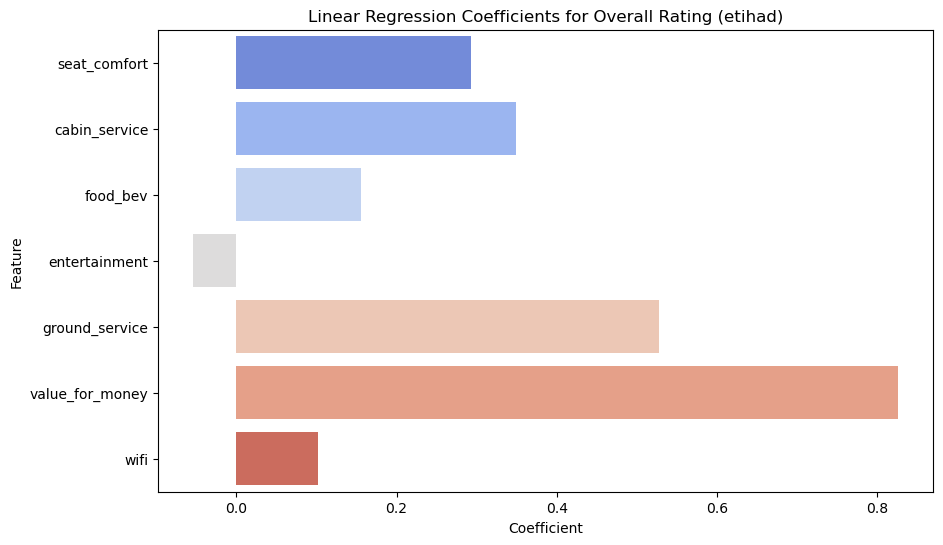

In [ ]:
df_etihad['overall'] = pd.to_numeric(df_etihad['overall'], errors='coerce')

numeric_columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Drop only the rows where there are missing values in the 'overall' column
df_etihad = df_etihad.dropna(subset=['overall'])

# Define numerical independent variables (X) and the target variable (y)
X = df_etihad[numeric_columns]
y = df_etihad['overall']

# Impute missing values in X using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Display coefficients to see the impact of each feature on the overall rating
coefficients = pd.DataFrame({'Feature': numeric_columns, 'Coefficient': model.coef_})
print(coefficients)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Linear Regression Coefficients for Overall Rating (etihad)')
plt.show()


Mean Squared Error: 1.41
           Feature  Coefficient
0     seat_comfort     0.321748
1    cabin_service     0.438920
2         food_bev     0.258815
3    entertainment     0.129493
4   ground_service     0.527195
5  value_for_money     0.968612


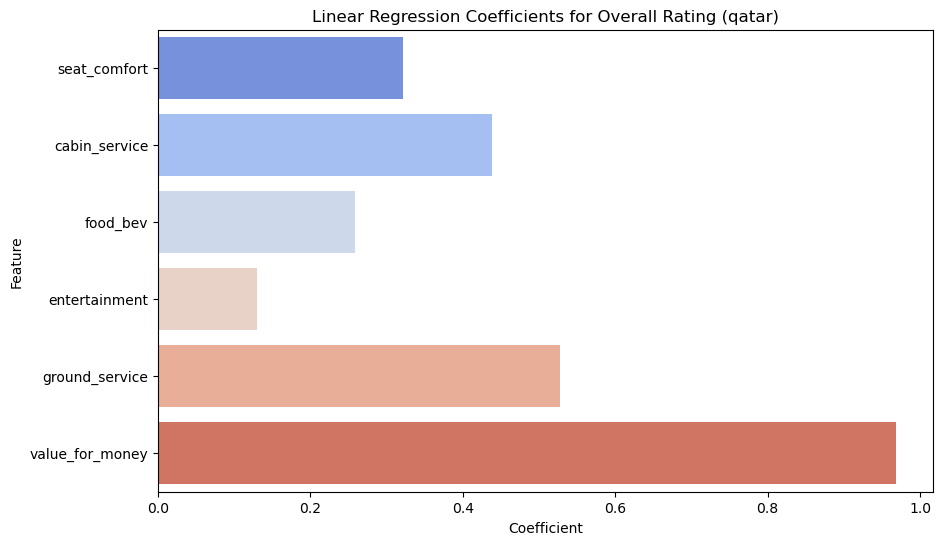

In [8]:
df_qatar['overall'] = pd.to_numeric(df_qatar['overall'], errors='coerce')

numeric_columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Drop only the rows where there are missing values in the 'overall' column
df_qatar = df_qatar.dropna(subset=['overall'])

# Define numerical independent variables (X) and the target variable (y)
X = df_qatar[numeric_columns]
y = df_qatar['overall']

# Impute missing values in X using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Display coefficients to see the impact of each feature on the overall rating
coefficients = pd.DataFrame({'Feature': numeric_columns, 'Coefficient': model.coef_})
print(coefficients)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Linear Regression Coefficients for Overall Rating (qatar)')
plt.show()


### Here we check what's the percentage of "not recommended" reviews for each airline.
### Then we average the numeric rating with only "not recommended" reviews.
From here we can see qatar has the highest recommended percentage of reviews out of the three.
And even with negative reviews only, qatar still has the higher score across all metrics.

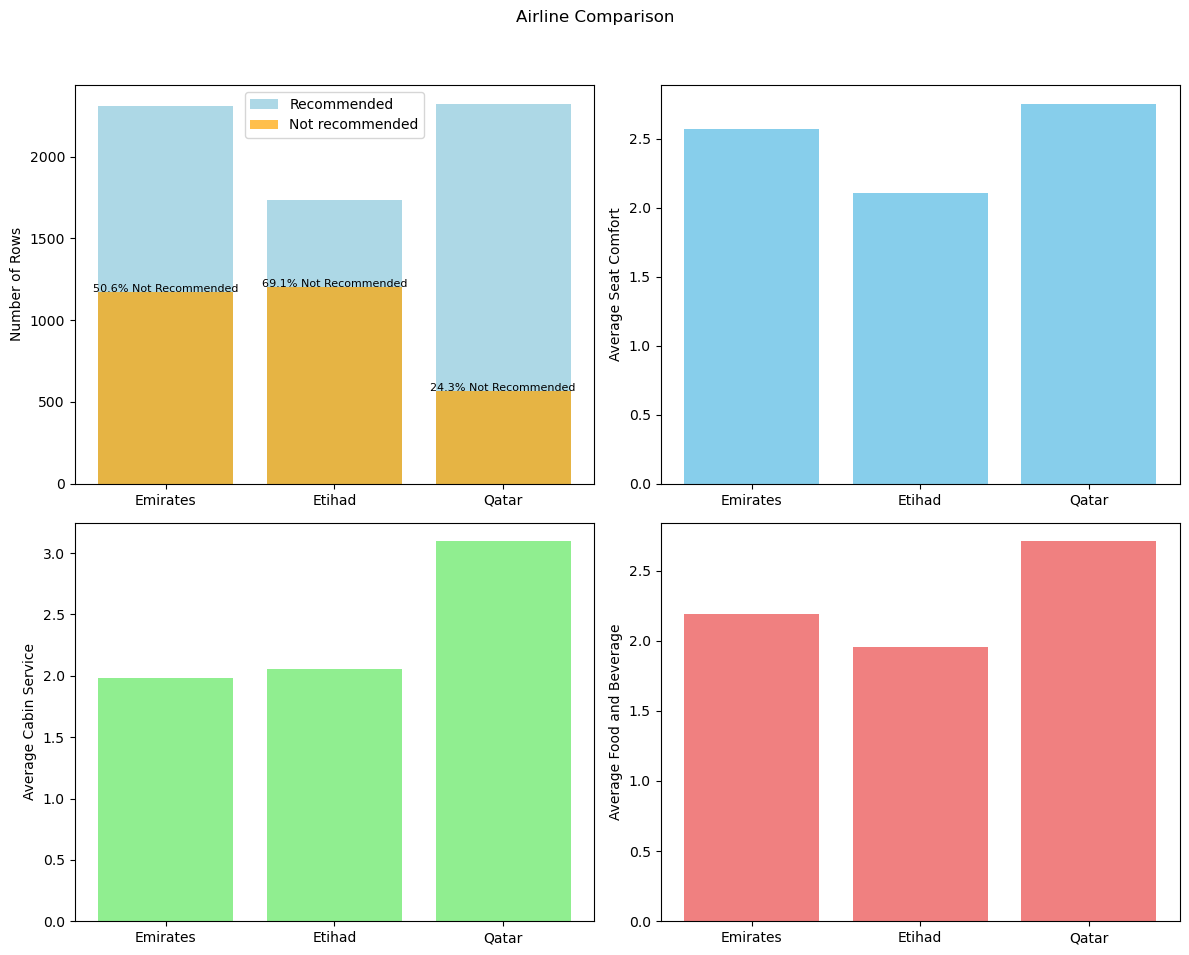

In [ ]:
# Reload df
df_emirate = pd.read_csv('raw_data/emirates.csv')
df_etihad = pd.read_csv('raw_data/etihad_airways.csv')
df_qatar = pd.read_csv('raw_data/qatar_airways.csv')

# Create a list of DataFrames
dfs = [df_emirate, df_etihad, df_qatar]
airline_names = ['Emirates', 'Etihad', 'Qatar']

# Initialize lists to store results
total_rows_list = []
remaining_rows_list = []
average_seat_comfort_list = []
average_cabin_service_list = []
average_food_bev_list = []
average_entertainment_list = []

# Loop through the DataFrames
for i, df in enumerate(dfs):
    # Count the number of rows in the original DataFrame
    total_rows = len(df)
    total_rows_list.append(total_rows)

    # Filter out rows where 'recommended' is 'no'
    df_negative = df[df['recommended'] == 'no']

    # Count the number of rows after filtering
    remaining_rows = len(df_negative)
    remaining_rows_list.append(remaining_rows)

    # Calculate the average scores for specified columns
    average_seat_comfort = df_negative['seat_comfort'].astype(float).mean()
    average_cabin_service = df_negative['cabin_service'].astype(float).mean()
    average_food_bev = df_negative['food_bev'].astype(float).mean()
    average_entertainment = df_negative['entertainment'].astype(float).mean()

    average_seat_comfort_list.append(average_seat_comfort)
    average_cabin_service_list.append(average_cabin_service)
    average_food_bev_list.append(average_food_bev)
    average_entertainment_list.append(average_entertainment)

# Plot the results with percentage of not recommended reviews
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Airline Comparison')

# Plot total and not recommended reviews with text annotations
axes[0, 0].bar(airline_names, total_rows_list, label='Recommended', color='lightblue')
axes[0, 0].bar(airline_names, remaining_rows_list, label='Not recommended', color='orange', alpha=0.7)
axes[0, 0].set_ylabel('Number of Rows')
axes[0, 0].legend()

# Add text annotations for the percentage of not recommended reviews
for i, (total, remaining) in enumerate(zip(total_rows_list, remaining_rows_list)):
    height = remaining_rows_list[i]
    axes[0, 0].text(i, height + 0.05,
                    f'{100 * remaining / total:.1f}% Not Recommended', ha='center', fontsize=8)

# Plot average seat comfort
axes[0, 1].bar(airline_names, average_seat_comfort_list, color='skyblue')
axes[0, 1].set_ylabel('Average Seat Comfort')

# Plot average cabin service
axes[1, 0].bar(airline_names, average_cabin_service_list, color='lightgreen')
axes[1, 0].set_ylabel('Average Cabin Service')

# Plot average food and beverage
axes[1, 1].bar(airline_names, average_food_bev_list, color='lightcoral')
axes[1, 1].set_ylabel('Average Food and Beverage')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()